In [34]:
import numpy as np
import polars as pl
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

v = 306
n = 200
i_0 = 120
q = 200
num_runs = 5

In [35]:
def get_all_csv(name):
    df = pl.DataFrame()
    errors = 0
    for r in range(num_runs):
        try:
            res = pl.read_csv(f'{name}_r{r}.csv')
            df = pl.concat([df, res])
        except:
            errors +=1

    
    return df

In [36]:
peak_aoi_rdf = get_all_csv(f'../res/v{v}_parsed/peak_aoi_rdf_n{n}_i{i_0}_q{q}_mg100')
peak_aoi_nc_rdf_0 = get_all_csv(f'../res/v{v}_parsed/peak_aoi_rdf_n{n}_i{i_0}_q{q}_mg0')
peak_aoi_nc_rdf_30 = get_all_csv(f'../res/v{v}_parsed/peak_aoi_rdf_n{n}_i{i_0}_q{q}_mg30')
peak_aoi_nc_rdf_50 = get_all_csv(f'../res/v{v}_parsed/peak_aoi_rdf_n{n}_i{i_0}_q{q}_mg50')
# peak_aoi_cbf = get_all_csv(f'../res/v{v}_parsed/peak_aoi_rdf_n{n}_i{i_cbf}_q0')
# peak_aoi_sf = get_all_csv(f'../res/v{v}_parsed/peak_aoi_sf_n{n}_i{i_sf}_p{p}')
# peak_aoi_pf = get_all_csv(f'../res/v{v}_parsed/peak_aoi_sf_n{n}_i{i_pf}_p100')


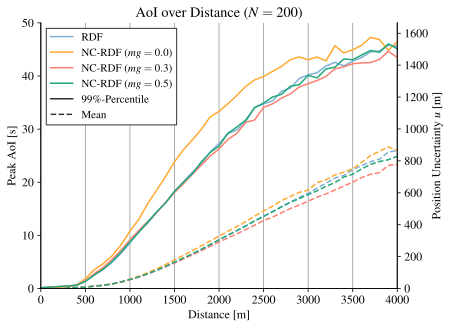

In [37]:
rdf_color = '#7eb0d5'
sf_color = '#fd7f6f'
pf_color = '#23a67a'
cbf_color = '#ffa92f'

dist_max = math.sqrt(n/12) * 1000
pctl = 99

fig, ax = plt.subplots()
bin_width = 100
bins = np.arange(-bin_width/2, dist_max + bin_width/2, bin_width)
bin_95_rdf, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_rdf['dist'].to_numpy(), peak_aoi_rdf['aoi'].to_numpy(), statistic=lambda a: np.percentile(a, pctl), bins=bins)
bin_95_nc_rdf_0, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_nc_rdf_0['dist'].to_numpy(), peak_aoi_nc_rdf_0['aoi'].to_numpy(), statistic=lambda a: np.percentile(a, pctl), bins=bins)
bin_95_nc_rdf_30, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_nc_rdf_30['dist'].to_numpy(), peak_aoi_nc_rdf_30['aoi'].to_numpy(), statistic=lambda a: np.percentile(a, pctl), bins=bins)
bin_95_nc_rdf_50, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_nc_rdf_50['dist'].to_numpy(), peak_aoi_nc_rdf_50['aoi'].to_numpy(), statistic=lambda a: np.percentile(a, pctl), bins=bins)

bin_means_rdf, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_rdf['dist'].to_numpy(), peak_aoi_rdf['aoi'].to_numpy(), statistic='mean', bins=bins)
bin_means_nc_rdf_0, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_nc_rdf_0['dist'].to_numpy(), peak_aoi_nc_rdf_0['aoi'].to_numpy(), statistic='mean', bins=bins)
bin_means_nc_rdf_30, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_nc_rdf_30['dist'].to_numpy(), peak_aoi_nc_rdf_30['aoi'].to_numpy(), statistic='mean', bins=bins)
bin_means_nc_rdf_50, bin_edges, _ = scipy.stats.binned_statistic(peak_aoi_nc_rdf_50['dist'].to_numpy(), peak_aoi_nc_rdf_50['aoi'].to_numpy(), statistic='mean', bins=bins)

bin_centers = (bin_edges[1:] + bin_edges[0:-1]) / 2
ax.plot(bin_centers, bin_means_rdf, '--', color=rdf_color)
ax.plot(bin_centers, bin_means_nc_rdf_0, '--', color=cbf_color)
ax.plot(bin_centers, bin_means_nc_rdf_30, '--', color=sf_color)
ax.plot(bin_centers, bin_means_nc_rdf_50, '--', color=pf_color)
ax.plot(bin_centers, bin_95_rdf,  color=rdf_color, label=f"RDF")
ax.plot(bin_centers, bin_95_nc_rdf_0,  color=cbf_color, label=f'NC-RDF ($mg = 0.0$)')
ax.plot(bin_centers, bin_95_nc_rdf_30,  color=sf_color, label=f'NC-RDF ($mg = 0.3$)')
ax.plot(bin_centers, bin_95_nc_rdf_50,  color=pf_color, label=f'NC-RDF ($mg = 0.5$)')
# ax.scatter(peak_aoi_rdf['dist'][0:5000], peak_aoi_rdf['aoi'][0:5000], color=rdf_color,s=5, alpha=0.1)
# ax.scatter(peak_aoi_pf['dist'][0:5000], peak_aoi_pf['aoi'][0:5000], color=pf_color,s=5, alpha=0.1)
# ax.scatter(peak_aoi_sf['dist'][0:5000], peak_aoi_sf['aoi'][0:5000], color=sf_color,s=5, alpha=0.1)
# ax.scatter(peak_aoi_cbf['dist'][0:5000], peak_aoi_cbf['aoi'][0:5000], color=cbf_color,s=5, alpha=0.1)

plt.plot([-1],[0], label=f'99\%-Percentile', color='#333')
plt.plot([-1],[0], '--', label=f'Mean', color='#333')

ax.set_xlabel('Distance [m]')
ax.set_ylabel('Peak AoI [s]')
leg = ax.legend(fancybox=False, framealpha=1.0, prop={'size': 11})
leg.get_frame().set_edgecolor('#333')
T_max = 50
ax.set_ylim([0, T_max])
ax.set_xlim([0, bin_centers[-1]])

#ax.plot(bin_centers, bin_centers / 33.3)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Position Uncertainty $u$ [m]')  # we already handled the x-label with ax1
ax2.set_ylim([0, T_max * 33.3])


# ax.grid()
# ax2.grid()

ax.grid(True, which="both", axis='x', color="#333", alpha=0.5)
ax.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
plt.title(f'AoI over Distance ($N={n}$)')

plt.show()

fig.savefig(f"../figures/nc_rdf_peak_aoi_over_dist_n{n}_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/nc_rdf_peak_aoi_over_dist_n{n}_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)